In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

In [2]:
file="C:/Users/abhis/OneDrive/Desktop/ML Test/train.csv"
data=pd.read_csv(file)
data.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 4:00:00,1,0,1,1,9.84,11.365,48.0,15.0013,0,2,2
96,2011-01-05 5:00:00,1,0,1,1,9.02,11.365,47.0,11.0014,0,3,3
97,2011-01-05 6:00:00,1,0,1,1,8.20,9.850,47.0,15.0013,0,33,33
98,2011-01-05 7:00:00,1,0,1,1,7.38,9.090,43.0,12.9980,1,87,88


## Exploratory Data Analysis( EDA)

In [3]:
data.shape

(12980, 12)

### The dataset contains 12980 observations and 12 attributes.

In [4]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
data.rename(columns={'count':'total_count'},inplace=True)

In [6]:
data['datetime']=pd.to_datetime(data.datetime)
data['season']=data.season.astype('category')
data['holiday']=data.holiday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather']=data.weather.astype('category')

In [7]:
data.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count
count,12980,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2011-10-02 15:00:23.852080128,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
min,2011-01-01 00:00:00,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-05-20 02:45:00,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2011-10-02 23:30:00,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,2012-02-15 13:15:00,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,2012-06-30 00:00:00,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000
std,NaN,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887


In [8]:
data.isnull().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
total_count    0
dtype: int64

### No missing values found in the dataset.

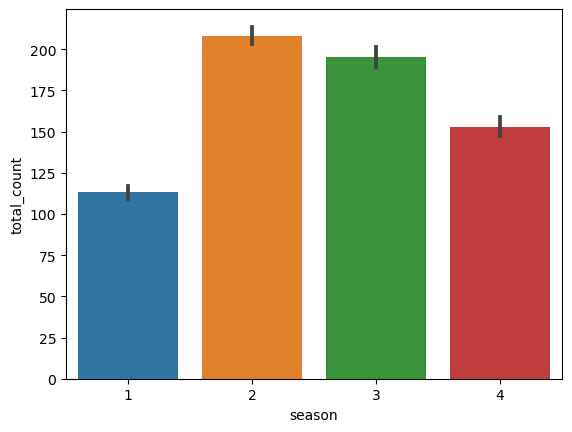

In [9]:
sns.barplot(x='season',y='total_count',data=data)
plt.show()

<Axes: xlabel='holiday', ylabel='total_count'>

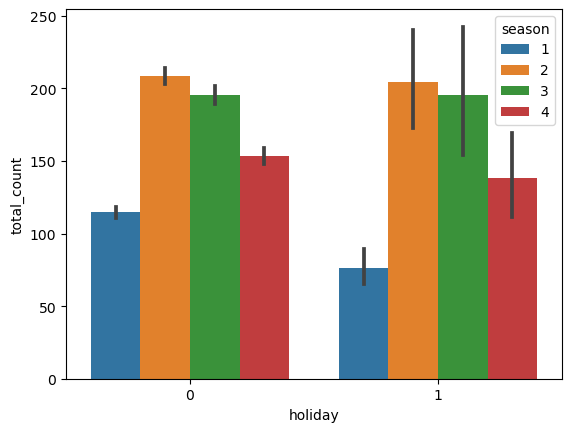

In [10]:
sns.barplot(x='holiday',y='total_count',data=data,hue='season')

#### Here, 0-> no holiday, 1->holiday

#### From the above  bar plot, we can observe that during no holiday, the bike rental counts were more as compared to that during holiday for different seasons.

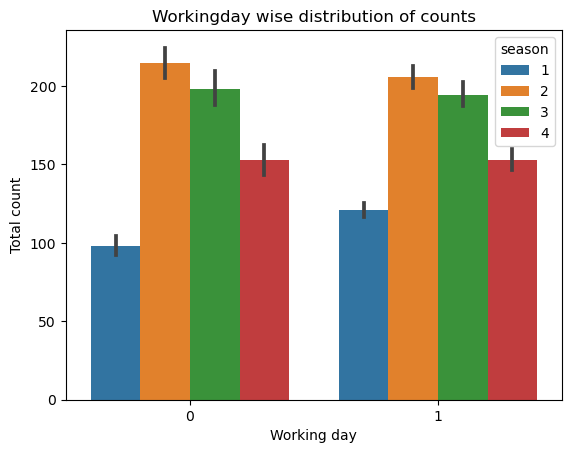

In [11]:
sns.barplot(data=data,x='workingday',y='total_count',hue='season')
plt.title('Workingday wise distribution of counts')
plt.xlabel('Working day')
plt.ylabel("Total count")
plt.show()

### Here, o->  No workingday, 1->workingday

#### From the above barplot, we can observe that duringg working day, the bike  rental count is quite highest compared to that during no working day for different seasons.

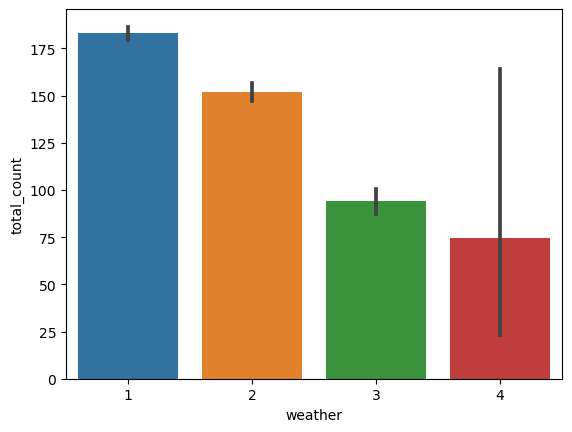

In [12]:
sns.barplot(x='weather',y='total_count',data=data)
plt.show()

### From the above bar plot, it can be concluded that during spring  ans summer type of weather, the bike rental count were highest as compared to during fall and winter type weather condition.

# Outliers

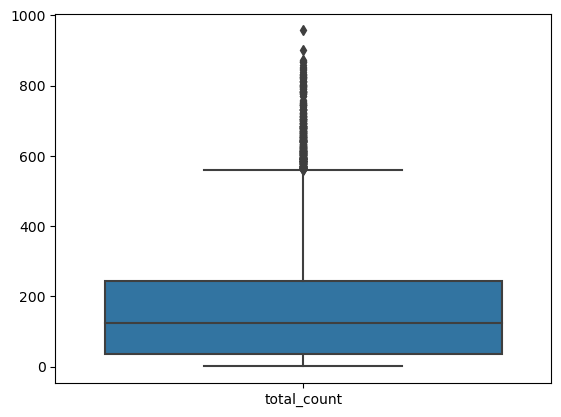

In [13]:
sns.boxplot(data=data[['total_count']])
plt.show()

In [14]:
# Outliers present in the total_count column

q1=data['total_count'].quantile(0.25)
q3=data['total_count'].quantile(0.75)
q1,q3


(35.0, 245.0)

In [15]:
iqr=q3-q1
iqr

210.0

In [16]:
up_th=q3+(1.5*iqr)
up_th

560.0

In [17]:
data[data['total_count']>560.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
2995,2011-05-09 17:00:00,2,0,1,1,25.42,31.060,38.0,16.9979,59,539,598
3019,2011-05-10 17:00:00,2,0,1,1,26.24,31.060,33.0,0.0000,79,532,611
3067,2011-05-12 17:00:00,2,0,1,2,26.24,31.060,57.0,12.9980,54,540,594
3187,2011-05-17 17:00:00,2,0,1,1,25.42,30.305,65.0,27.9993,83,521,604
3211,2011-05-18 17:00:00,2,0,1,1,24.60,29.545,69.0,8.9981,78,487,565
...,...,...,...,...,...,...,...,...,...,...,...,...
12939,2012-06-28 08:00:00,3,0,1,1,27.06,31.060,50.0,8.9981,40,577,617
12948,2012-06-28 17:00:00,3,0,1,1,36.08,37.120,22.0,12.9980,71,634,705
12949,2012-06-28 18:00:00,3,0,1,1,35.26,36.365,25.0,15.0013,100,597,697
12950,2012-06-28 19:00:00,3,0,1,1,34.44,36.365,30.0,19.9995,79,492,571


In [18]:
data['total_count']=np.where(data['total_count']>up_th, up_th,data['total_count'])

In [19]:
data[data['total_count']>560.0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count


### Outliers removed

<Axes: xlabel='total_count'>

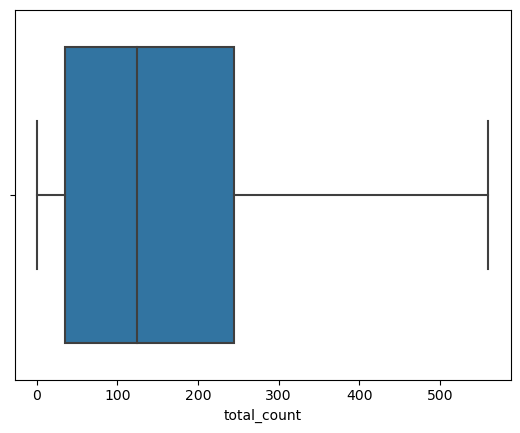

In [20]:
sns.boxplot(x=data['total_count'])

## Outliers in the total_count field have been imputed

# Checking outliers in temp, humidity and windspeed fields

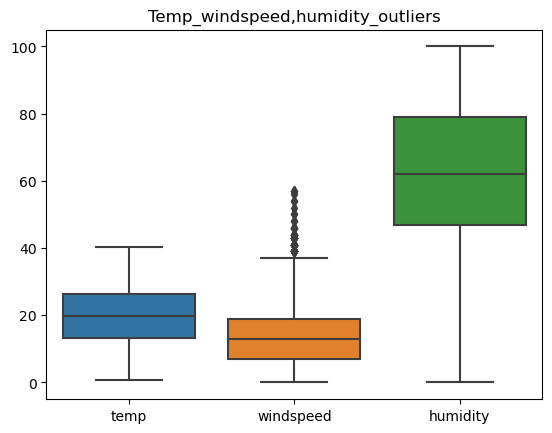

In [21]:
sns.boxplot(data=data[['temp','windspeed','humidity']])
plt.title("Temp_windspeed,humidity_outliers")
plt.show()

### Outliers found in the windspeed column

In [22]:
!pip install fancyimpute

In [23]:
from fancyimpute import KNN
win=pd.DataFrame(data,columns=['windspeed'])
cnames=['windspeed']
for i in cnames:
    q75,q25=np.percentile(win.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    win.loc[win.loc[:,i]<min,:i]=np.nan
    win.loc[win.loc[:,i]>max,:i]=np.nan

#Imputing the outliers by mean imputation
win['windspeed']=win['windspeed'].fillna(win['windspeed'].mean())

<Axes: xlabel='windspeed'>

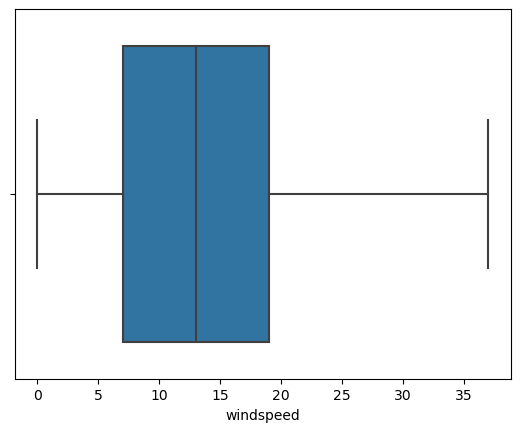

In [24]:
sns.boxplot(x=win['windspeed'])

<Axes: xlabel='windspeed'>

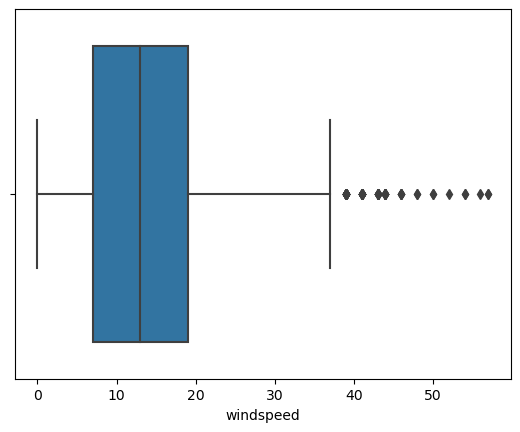

In [25]:
sns.boxplot(x=data['windspeed'])

In [26]:
data['windspeed']=win['windspeed']

<Axes: xlabel='windspeed'>

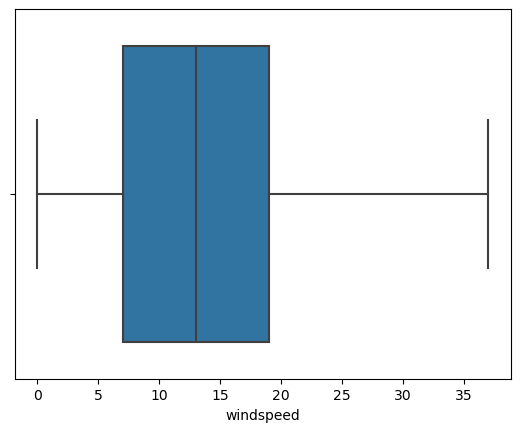

In [27]:
sns.boxplot(x=data['windspeed'])

## Outliers in the 'windspeed' field have been imputed successfully

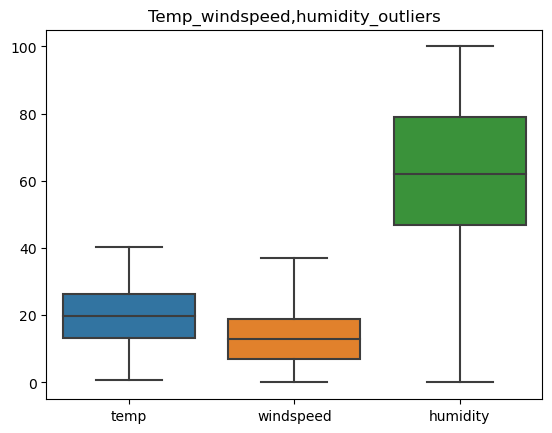

In [28]:
sns.boxplot(data=data[['temp','windspeed','humidity']])
plt.title("Temp_windspeed,humidity_outliers")
plt.show()

### No outliers found in the modified data

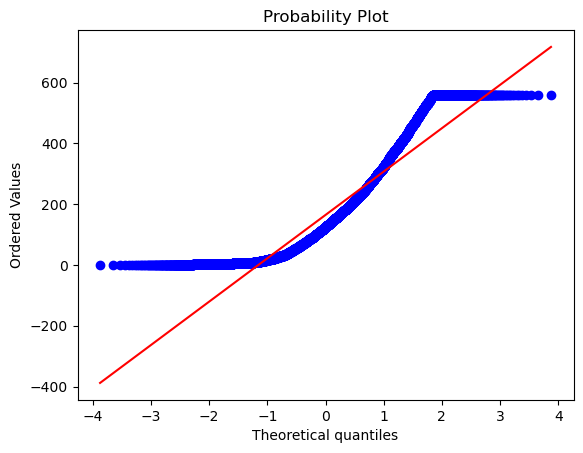

In [29]:
import scipy
from scipy import stats
stats.probplot(data.total_count.tolist(),dist='norm',plot=plt)
plt.show()

<Axes: >

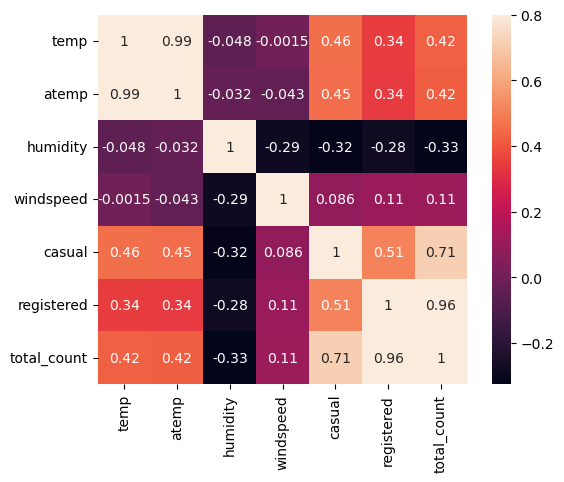

In [30]:
# Creating the correlation matrix

corm=data[['temp','atemp','humidity','windspeed','casual','registered','total_count']].corr()
sns.heatmap(corm,vmax=0.8,square=True,annot=True)

# We are going to ignore atemp, casual and registered variables for further analysis

In [31]:
X=data[["season","holiday","workingday","weather","temp","humidity","windspeed"]]
y=data['total_count']
cat_attributes=['season','holiday','workingday','weather']
num_attributes=['temp','humidity','windspeed']

In [32]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [33]:
print("Train data shape",X_train.shape,"\nTest data shape",X_test.shape)

Train data shape (10384, 7) 
Test data shape (2596, 7)


In [34]:
train_encoded_attributes=pd.get_dummies(X_train,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (10384, 15)


,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
7536,22.14,60.0,8.9981,False,False,False,True,True,False,False,True,False,True,False,False
3021,24.60,43.0,15.0013,False,True,False,False,True,False,False,True,True,False,False,False
2372,18.04,62.0,26.0027,False,True,False,False,True,False,False,True,True,False,False,False
6918,18.04,51.0,19.9995,False,False,False,True,True,False,False,True,True,False,False,False
7855,21.32,83.0,8.9981,False,False,False,True,True,False,False,True,False,True,False,False


In [35]:
X_train=train_encoded_attributes
X_train.head()

,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
7536,22.14,60.0,8.9981,False,False,False,True,True,False,False,True,False,True,False,False
3021,24.60,43.0,15.0013,False,True,False,False,True,False,False,True,True,False,False,False
2372,18.04,62.0,26.0027,False,True,False,False,True,False,False,True,True,False,False,False
6918,18.04,51.0,19.9995,False,False,False,True,True,False,False,True,True,False,False,False
7855,21.32,83.0,8.9981,False,False,False,True,True,False,False,True,False,True,False,False


##  Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg

LinearRegression()

In [37]:
linreg.fit(X_train,y_train)
print("Model is trained.")

Model is trained.


In [38]:
lr=linreg.score(X_train,y_train)
print("Accuracy of the model is:",round(lr,3))

Accuracy of the model is: 0.303


### Accuracy of Linear Regression is 30%

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [40]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [41]:
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.2974870648501132


### Accuracy of Decision Tree Regressor is 29%

# Random Forest

In [42]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=1)

In [43]:
train_encoded_attributes=pd.get_dummies(X_train,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (10384, 15)


,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
5089,27.06,74.0,7.0015,False,False,True,False,True,False,False,True,True,False,False,False
1990,12.30,22.0,8.9981,False,True,False,False,True,False,False,True,True,False,False,False
6057,26.24,69.0,7.0015,False,False,True,False,True,False,False,True,False,True,False,False
1545,13.94,76.0,16.9979,True,False,False,False,True,False,False,True,False,True,False,False
7690,16.40,94.0,8.9981,False,False,False,True,True,False,False,True,False,False,True,False


In [44]:
test_encoded_attributes=pd.get_dummies(X_test,columns=cat_attributes)
print('Shape of transfomed dataframe::',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transfomed dataframe:: (2596, 15)


,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
5150,36.90,42.0,19.9995,False,False,True,False,True,False,True,False,True,False,False,False
10844,18.86,72.0,0.0000,False,True,False,False,True,False,True,False,False,False,True,False
5749,26.24,65.0,12.9980,False,False,True,False,True,False,False,True,True,False,False,False
12352,25.42,43.0,11.0014,False,True,False,False,True,False,True,False,True,False,False,False
10315,12.30,39.0,15.0013,True,False,False,False,True,False,True,False,True,False,False,False


In [46]:
X_train=train_encoded_attributes
y_train=y_train.reset_index()
y_train=y_train.total_count.values
X_train.head()

,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
5089,27.06,74.0,7.0015,False,False,True,False,True,False,False,True,True,False,False,False
1990,12.30,22.0,8.9981,False,True,False,False,True,False,False,True,True,False,False,False
6057,26.24,69.0,7.0015,False,False,True,False,True,False,False,True,False,True,False,False
1545,13.94,76.0,16.9979,True,False,False,False,True,False,False,True,False,True,False,False
7690,16.40,94.0,8.9981,False,False,False,True,True,False,False,True,False,False,True,False


In [47]:
X_test=test_encoded_attributes
X_test.head()

,temp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
5150,36.90,42.0,19.9995,False,False,True,False,True,False,True,False,True,False,False,False
10844,18.86,72.0,0.0000,False,True,False,False,True,False,True,False,False,False,True,False
5749,26.24,65.0,12.9980,False,False,True,False,True,False,False,True,True,False,False,False
12352,25.42,43.0,11.0014,False,True,False,False,True,False,True,False,True,False,False,False
10315,12.30,39.0,15.0013,True,False,False,False,True,False,True,False,True,False,False,False


In [48]:
#training the model
from sklearn.ensemble import RandomForestRegressor
X_train=train_encoded_attributes
rf=RandomForestRegressor(n_estimators=200)

In [49]:
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [50]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',round(rf_score,2))

Accuracy of the model : 0.85


### Accuracy of Random Forest is 85%

In [51]:
rf_pred=rf.predict(X_test)
rf_pred

array([305.01916667, 112.66696627, 166.51041667, ...,  71.97297619,
        93.54208333,  71.32891667])

In [52]:
Bike=pd.DataFrame({"Actual":y_test,"Predicted":rf_pred}).set_index("Actual")

In [53]:
Bike.to_csv("Bike predictions Final.csv")
Bike

,Predicted
Actual,
370.0,305.019167
63.0,112.666966
64.0,166.510417
246.0,328.076333
110.0,108.202500
...,...
118.0,179.524167
212.0,198.728333
8.0,71.972976


In [54]:
from sklearn.metrics import mean_squared_log_error
y_true=y_test
y_pred=rf_pred
MSLE=mean_squared_log_error(y_true,y_pred)
import math
RMSLE=math.sqrt(MSLE)
RMSLE

1.2652744921579204

In [55]:
import joblib

In [56]:
joblib.dump(rf,"Random Forest Regressor.sav")

['Random Forest Regressor.sav']